In [1]:
# Import packages we need to use
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file of the movie gross data
movie_gross_df = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')

In [3]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
movie_gross_df.index

RangeIndex(start=0, stop=3387, step=1)

In [5]:
# Diplay the movie gross dataframe's first five rows
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# Establish a connection to the IMDB data
conn = sqlite3.connect('../../zippedData/im.db')

In [7]:
# Use SQL to show the read the IMDB dataframe 
imdb_df = pd.read_sql("""
SELECT *
FROM movie_basics
""",conn)

In [8]:
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
# Read the csv file and display the movie budgets' dataframe
movie_budgets_df = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
# Convert production_budget, domestic_gross, and worldwide_gross to numeric values
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', '').astype('float')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype('float')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype('float')


In [12]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [13]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


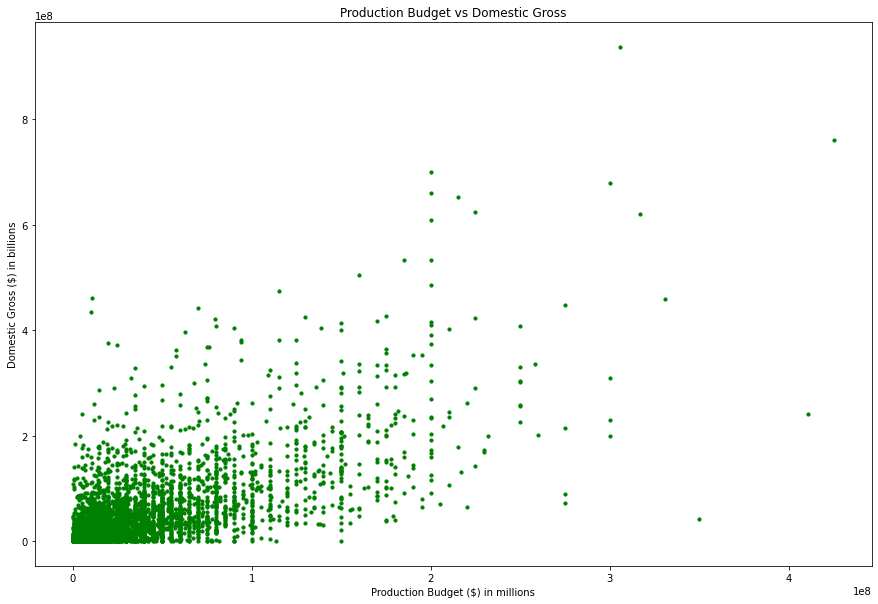

In [14]:
# Create scatter plot of production budget vs domestic gross
movie_budgets_df.plot(kind='scatter', x='production_budget', y='domestic_gross', figsize=(15, 10), s=10, c='green')
plt.xlabel('Production Budget ($) in millions')
plt.ylabel('Domestic Gross ($) in billions')
plt.title('Production Budget vs Domestic Gross')
plt.show()

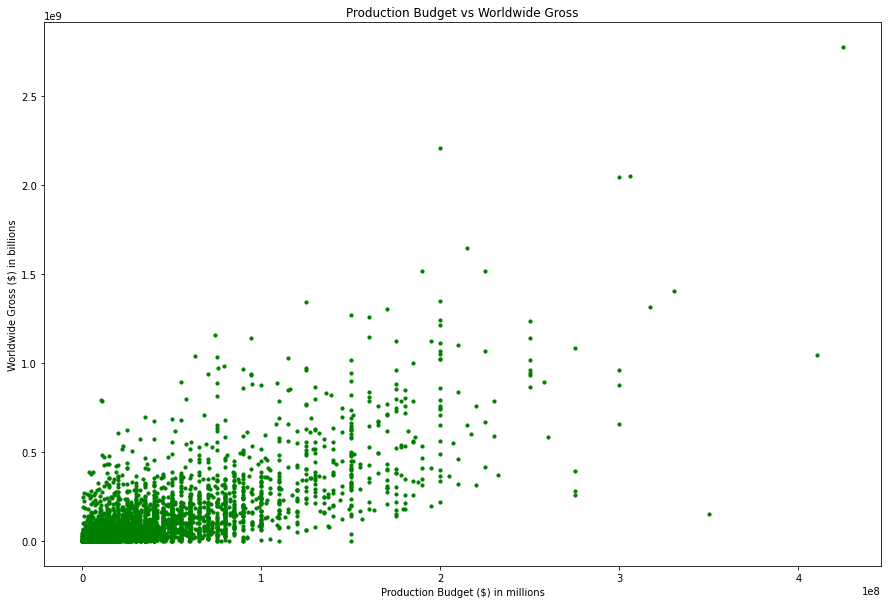

In [15]:
# Create scatter plot of production budget vs worldwide gross
movie_budgets_df.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(15, 10), s=10, c='green')
plt.xlabel('Production Budget ($) in millions')
plt.ylabel('Worldwide Gross ($) in billions')
plt.title('Production Budget vs Worldwide Gross')
plt.show()

In [16]:
# Calculate the profit and add it as a new column to the movie budgets dataframe
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

# Sort the dataframe by the profit column in descending order to see the most successful movies
most_profitable_movies = movie_budgets_df.sort_values('profit', ascending=False)

most_profitable_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-9.463523e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.069000e+08
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-1.104502e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [17]:
merged_genre_profit = pd.merge(imdb_df, movie_budgets_df, left_on='primary_title', right_on='movie')
merged_genre_profit

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,-44926294.0
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000.0,70433227.0,122133227.0,102133227.0
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,965996.0
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,965996.0
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,-15686698.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,2500000.0,174255.0,174255.0,-2325745.0
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,5000000.0,12592907.0,12592907.0,7592907.0
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,22000000.0,23530831.0,27882226.0,5882226.0
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,40000000.0,75305995.0,124823094.0,84823094.0


In [18]:
merged_genre_profit.sort_values('profit', ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1747,tt1775309,Avatar,Abatâ,2011,93.0,Horror,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2776,tt8852130,Titanic,Titanic,2018,115.0,Family,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2775,tt2495766,Titanic,Titanic,2012,NaN,Adventure,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
3360,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
12,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,tt7504726,Call of the Wild,Call of the Wild,2020,NaN,"Adventure,Animation,Family",36,"Feb 21, 2020",Call of the Wild,82000000.0,0.0,0.000000e+00,-8.200000e+07
3566,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",80,"Dec 13, 2017",Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07
2580,tt2283336,Men in Black: International,Men in Black: International,2019,115.0,"Action,Adventure,Comedy",42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.069000e+08
792,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-1.104502e+08


In [19]:
genre_profit = merged_genre_profit[['profit', 'genres']]

In [20]:
genre_profit = genre_profit.groupby('genres')['profit'].sum().reset_index()

In [21]:
top_genres = genre_profit.sort_values(by='profit', ascending=False).head(10)

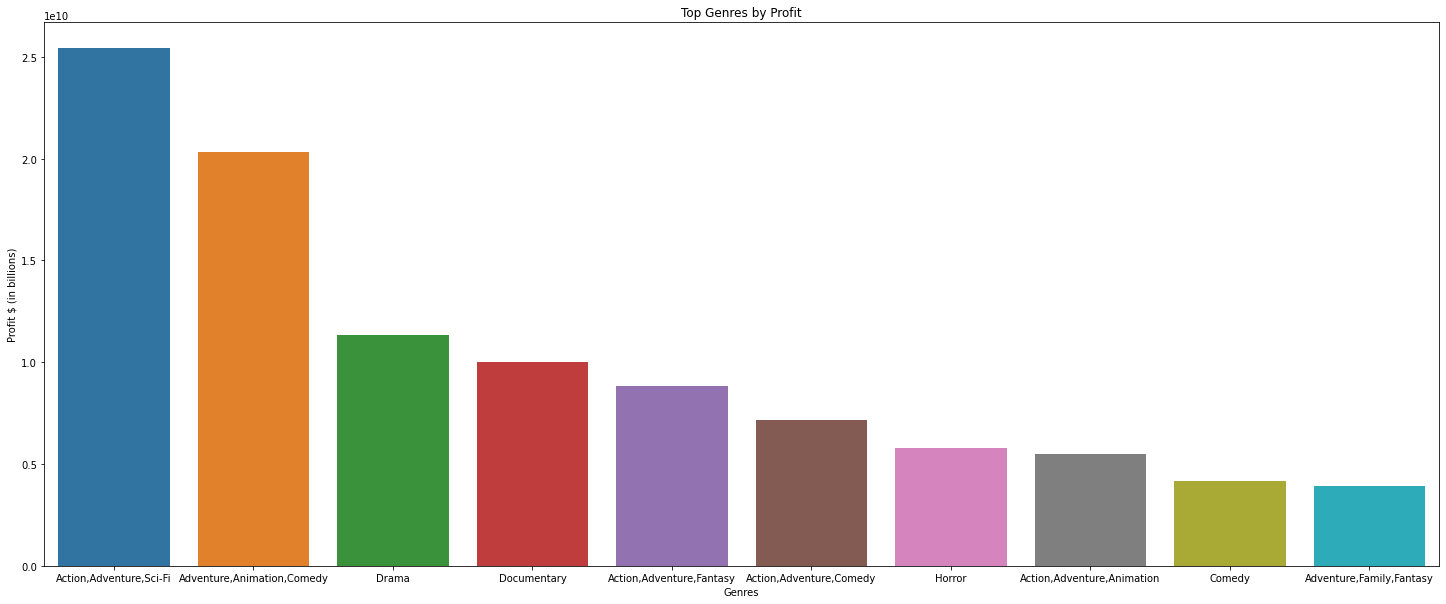

In [22]:
plt.figure(figsize=(25,10))
sns.barplot(x='genres', y='profit', data=top_genres)
plt.title('Top Genres by Profit')
plt.xlabel('Genres')
plt.ylabel('Profit $ (in billions)')
plt.show()

# Work with Alameen

In [23]:
movie_budgets_df['ROI'] = 100 * (movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget'])/movie_budgets_df['production_budget']

In [24]:
movie_budgets_df['ROI']

0         553.257713
1         154.667286
2         -57.210757
3         324.384139
4         315.369636
            ...     
5777     -100.000000
5778     3908.250000
5779      -73.240000
5780     -100.000000
5781    16358.272727
Name: ROI, Length: 5782, dtype: float64

In [25]:
merged_genre_profit.describe()

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,profit
count,3815.000000,3328.000000,3815.000000,3.815000e+03,3.815000e+03,3.815000e+03,3.815000e+03
mean,2014.292529,97.204627,50.447182,3.260818e+07,4.031735e+07,9.412387e+07,6.151569e+07
std,2.691415,27.533206,28.712511,4.495916e+07,7.125255e+07,1.920225e+08,1.602825e+08
min,2010.000000,1.000000,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,2012.000000,87.000000,26.000000,4.500000e+06,4.095390e+05,2.050450e+06,-3.000000e+06
50%,2014.000000,98.000000,50.000000,1.600000e+07,1.433464e+07,2.526868e+07,5.943792e+06
75%,2016.000000,112.000000,74.000000,4.000000e+07,4.783628e+07,9.404814e+07,5.548051e+07
max,2021.000000,360.000000,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09


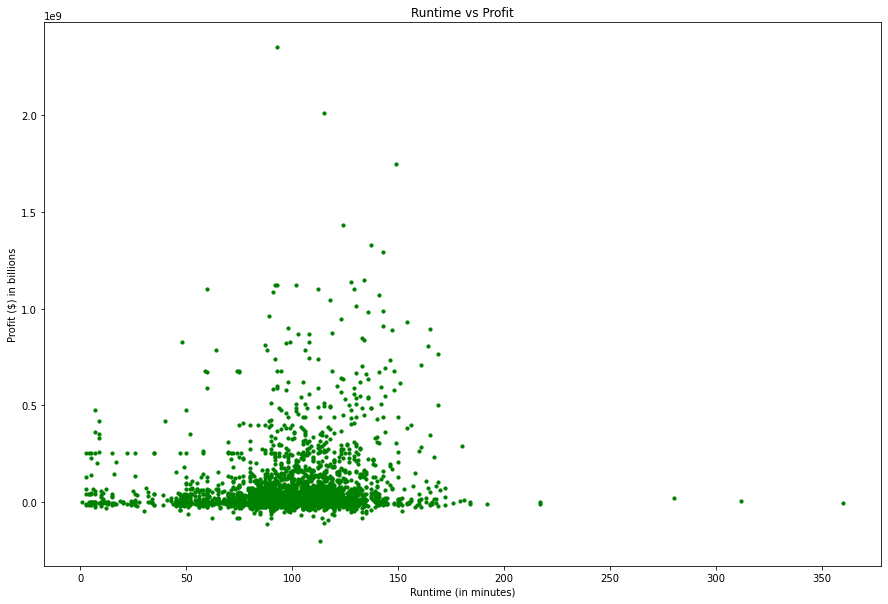

In [26]:
merged_genre_profit.plot(kind='scatter', x='runtime_minutes', y='profit', figsize=(15, 10), s=10, c='green')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Profit ($) in billions')
plt.title('Runtime vs Profit')
plt.show()

In [27]:
tmdb_df = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [28]:
merged_tmdb_budget = movie_budgets_df.merge(tmdb_df, how='inner', left_on='movie', right_on='title')

In [29]:
merged_tmdb_budget

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.711400,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.648403,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,1859.168000,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121
2381,51,"Apr 21, 2015",Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,-100.000000,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000.0,0.0,0.000000e+00,-2.200000e+04,-100.000000,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,-100.000000,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [30]:
new_merged = merged_tmdb_budget.drop(['original_title'], axis=1)

In [31]:
new_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713,6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286,2470,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139,14169,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.711400,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.648403,20623,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510


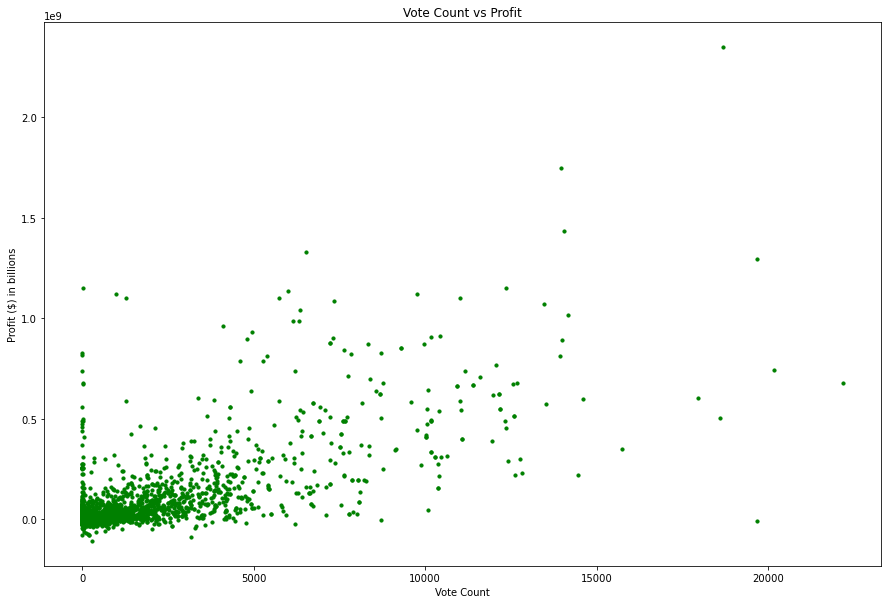

In [32]:
new_merged.plot(kind='scatter', x='vote_count', y='profit', figsize=(15, 10), s=10, c='green')
plt.xlabel('Vote Count')
plt.ylabel('Profit ($) in billions')
plt.title('Vote Count vs Profit')
plt.show()

In [33]:
new_merged.corr()

,id_x,production_budget,domestic_gross,worldwide_gross,profit,ROI,Unnamed: 0,id_y,popularity,vote_average,vote_count
id_x,1.000000,-0.068922,-0.030259,-0.049557,-0.040568,0.043429,0.025297,0.034761,-0.038721,0.012034,-0.028829
production_budget,-0.068922,1.000000,0.717331,0.794107,0.679251,-0.058814,0.021015,-0.146211,0.556587,0.127639,0.606330
domestic_gross,-0.030259,0.717331,1.000000,0.945834,0.941513,0.101455,0.029504,-0.097650,0.536002,0.204104,0.705910
worldwide_gross,-0.049557,0.794107,0.945834,1.000000,0.985450,0.082301,0.036395,-0.098295,0.563912,0.192811,0.723484
profit,-0.040568,0.679251,0.941513,0.985450,1.000000,0.115827,0.038071,-0.077805,0.525287,0.197130,0.704063
ROI,0.043429,-0.058814,0.101455,0.082301,0.115827,1.000000,0.044443,0.049700,0.048004,0.025274,0.073894
Unnamed: 0,0.025297,0.021015,0.029504,0.036395,0.038071,0.044443,1.000000,0.850705,0.153856,0.060377,0.038223
id_y,0.034761,-0.146211,-0.097650,-0.098295,-0.077805,0.049700,0.850705,1.000000,-0.075640,0.022488,-0.132112
popularity,-0.038721,0.556587,0.536002,0.563912,0.525287,0.048004,0.153856,-0.075640,1.000000,0.300024,0.735966
vote_average,0.012034,0.127639,0.204104,0.192811,0.197130,0.025274,0.060377,0.022488,0.300024,1.000000,0.333635


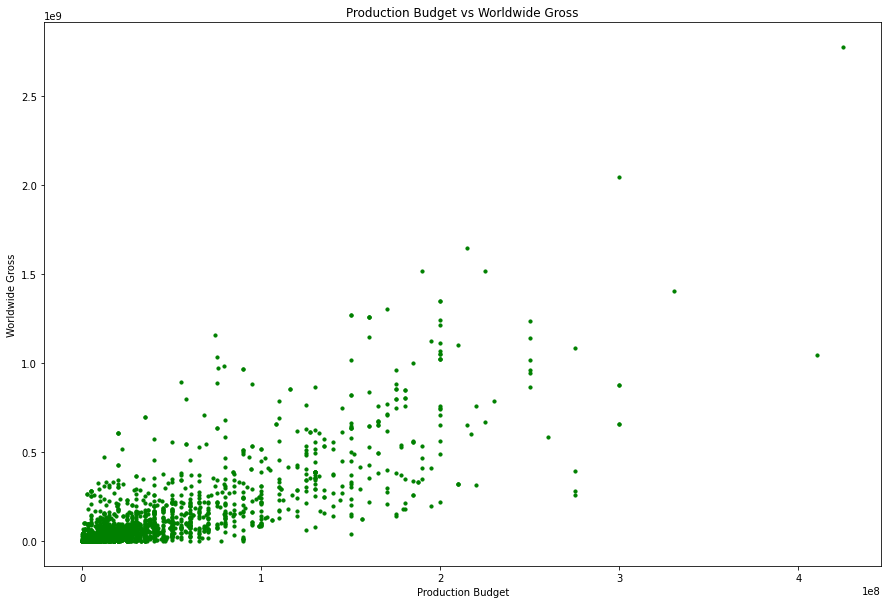

In [38]:
new_merged.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(15, 10), s=10, c='green')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs Worldwide Gross')
plt.show()

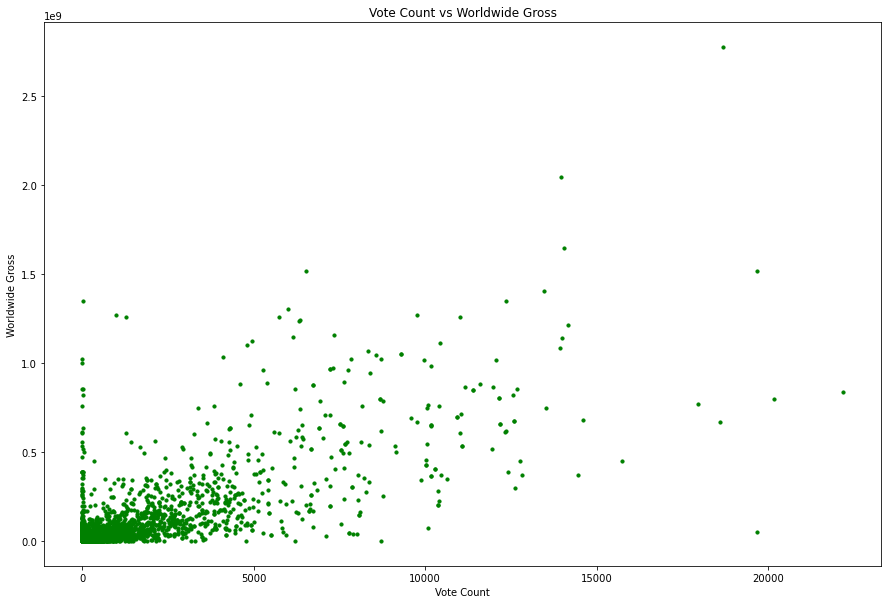

In [39]:
new_merged.plot(kind='scatter', x='vote_count', y='worldwide_gross', figsize=(15, 10), s=10, c='green')
plt.xlabel('Vote Count')
plt.ylabel('Worldwide Gross')
plt.title('Vote Count vs Worldwide Gross')
plt.show()